In [1]:
import matplotlib.pyplot as plt
import numpy as np

import cs229_2018_autumn.problem_sets.PS1.src.util as util
from cs229_2018_autumn.problem_sets.PS1.src.linear_model import LinearModel

In [2]:
ds1_training_set_path = "/teamspace/studios/this_studio/cs229_2018_autumn/problem_sets/PS1/data/ds1_train.csv"
ds1_valid_set_path = "/teamspace/studios/this_studio/cs229_2018_autumn/problem_sets/PS1/data/ds1_valid.csv"
ds2_training_set_path = "/teamspace/studios/this_studio/cs229_2018_autumn/problem_sets/PS1/data/ds2_train.csv"
ds2_valid_set_path = "/teamspace/studios/this_studio/cs229_2018_autumn/problem_sets/PS1/data/ds2_valid.csv"

In [3]:
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

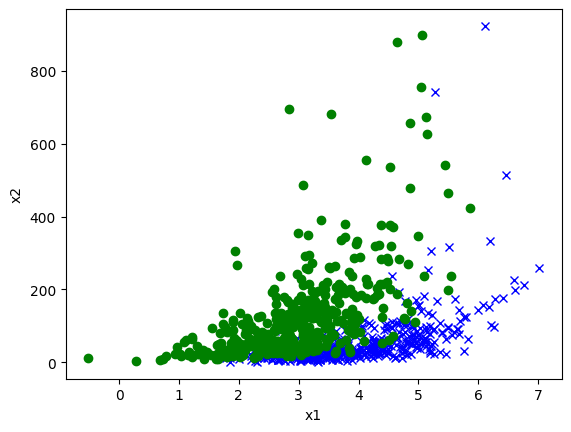

In [4]:
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x_train[y_train == 1, -2], x_train[y_train == 1, -1], "bx", linewidth=2)
plt.plot(x_train[y_train == 0, -2], x_train[y_train == 0, -1], "go", linewidth=2)

In [5]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """

        # *** START CODE HERE ***
        def h(theta, x):
            """Vectorized implementation of h_theta(x) = 1 / (1 + exp(-theta^T x)).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The hypothesis for all training examples. Shape (m,).
            """
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        def gradient(theta, x, y):
            """Vectorized implementation of the gradient of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :param y:     All labels of shape (m,).
            :return:      The gradient of shape (n,)."""

            m, _ = x.shape
            return -1 / m * np.dot(x.T, (y - h(theta, x)))

        def hessian(theta, x):
            """Vectorized implementation of the Hessian of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The Hessian of shape (n, n).
            """

            m, _ = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))

            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)

        def next_theta(theta, x, y):
            """The next theta updated by Newton's Method.

            :param theta: Shape (n,).
            :return:      The updated theta of shape (n,).
            """

            return theta - np.dot(
                np.linalg.inv(
                    hessian(
                        theta,
                        x,
                    )
                ),
                gradient(theta, x, y),
            )

        m, n = x.shape

        # Initialize theta
        if self.theta is None:
            self.theta = np.zeros(n)

        # Update theta using Newton's Method
        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta

        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        return x @ self.theta >= 0
        # *** END CODE HERE ***

In [6]:
# Train the logistic regression model:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

Theta is:  [-6.26018491  2.47707251 -0.0299125 ]
The accuracy on training set is:  0.8825


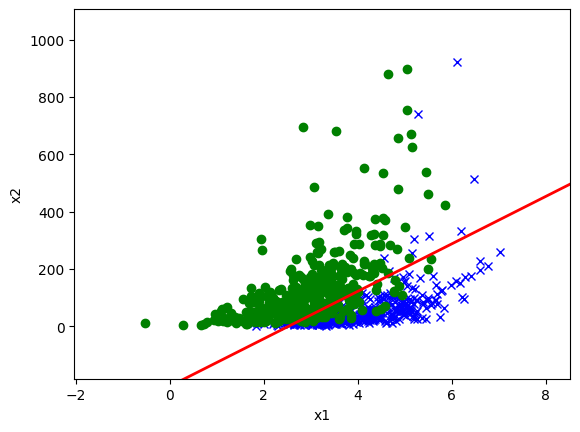

In [7]:
# Plot decision boundary for training set:
util.plot(x_train, y_train, theta=log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(log_reg.predict(x_train) == y_train))

The accuracy on validation set is:  0.9


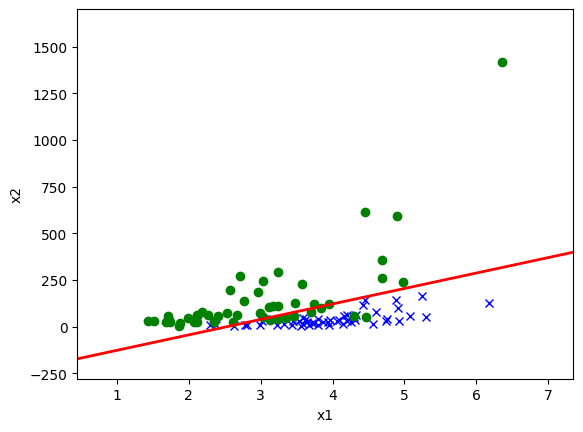

In [8]:
# Plot decision boundary for validation set:
util.plot(x_valid, y_valid, log_reg.theta)
print(
    "The accuracy on validation set is: ", np.mean(log_reg.predict(x_valid) == y_valid)
)